In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def NAND(a, b):
    input = np.array([a,b])
    weights = np.array([-0.6, -0.5])
    bias = 0.7
    value = np.sum(input*weights)+bias
    
    if value <= 0:
        return 0
    else:
        return 1

In [3]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


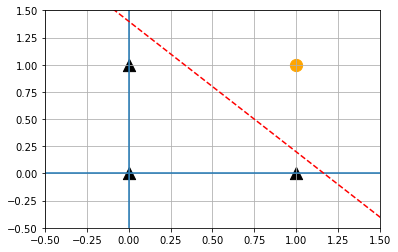

In [4]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
bias = 0.7

y = (0.6*x1-bias)/-0.5

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1, y, 'r--')

plt.scatter(0, 0, color='black', marker='^', s=150)
plt.scatter(0, 1, color='black', marker='^', s=150)
plt.scatter(1, 0, color='black', marker='^', s=150)
plt.scatter(1, 1, color='orange', marker='o', s=150)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

In [5]:
#Step 1

def NAND(a, b):
    input = np.array([a,b])
    weights = np.array([-0.6, -0.5])
    bias = 0.7
    value = np.sum(input*weights)+bias
    
    if value <= 0:
        return 0
    else:
        return 1

In [6]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


In [7]:
#Step 2

def AND(a, b):
    input = np.array([a,b])
    weights = np.array([0.4, 0.4])
    bias = -0.6
    value = np.sum(input*weights)+bias
    
    if value <= 0:
        return 0
    else:
        return 1

In [8]:
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


In [9]:
#Step 3

def OR(a, b):
    input = np.array([a,b])
    weights = np.array([0.4, 0.5])
    bias = -0.3
    value = np.sum(input*weights)+bias
    
    if value <= 0:
        return 0
    else:
        return 1

In [10]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


In [11]:
#Step 4

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [12]:
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


In [13]:
#활성화 함수

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
X = np.array([1.0, 0.5, 0.4])

W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6], [0.3, 0.5, 0.7]])
B1 = np.array([1, 1, 1])

print(W1.shape)

A1 = np.dot(X, W1)+B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

(3, 3)
[1.32 1.7  2.08]
[0.78918171 0.84553473 0.88894403]


In [15]:
W2 = np.array([[0.2, 0.4, 0.6], [0.1, 0.3, 0.5], [0.4, 0.6, 0.8]])
B2 = np.array([1, 1, 1])

print(W2.shape)

A2 = np.dot(Z1, W2)+B2
Z2 = sigmoid(A2)

print(Z2)

(3, 3)
[0.83173411 0.89116528 0.93133834]


In [16]:
W3 = np.array([[0.1, 0.3], [-0.1, -0.5], [0.3, 0.5]])
B3 = np.array([1, 1])

print(W3.shape)

A3 = np.dot(Z2, W3)+B3
Z3 = sigmoid(A3)

print(Z3)

(3, 2)
[0.78133419 0.78067542]


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = mnist.load_data()
print('Training data shape: ', train_input.shape)
print('Training label shape', train_target.shape)
print('Testing data shape', test_input.shape)
print('Testing label shape', test_target.shape)

Training data shape:  (60000, 28, 28)
Training label shape (60000,)
Testing data shape (10000, 28, 28)
Testing label shape (10000,)


In [18]:
from sklearn.model_selection import train_test_split

train_input = train_input.reshape(60000, 28*28).astype('float32')/255.0
test_input = test_input.reshape(10000, 28*28).astype('float32')/255.0
train_target = keras.utils.to_categorical(train_target, 10)
test_target = keras.utils.to_categorical(test_target, 10)
tf.random.set_seed(3)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [19]:
model = Sequential(name='team6MnistModel_1')
model.add(Dense(units=512, input_dim=(28*28), activation='relu', name='hidden1'))
model.add(Dense(units=24, activation='relu', name='hidden2'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax', name='output'))
model.summary()

Model: "team6MnistModel_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 24)                12312     
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 10)                250       
Total params: 414,482
Trainable params: 414,482
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.save('model-whole.h5')

In [22]:
model = keras.models.load_model('model-whole.h5')

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model-whole.h5')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [25]:
from tensorflow.keras import callbacks
history = model.fit(train_scaled, train_target, epochs=10, validation_split=0.3, callbacks=[checkpoint_cb, early_stopping_cb])

Train on 33600 samples, validate on 14400 samples
Epoch 1/10
33600/33600 [==============================] - 5s 137us/sample - loss: 0.4424 - accuracy: 0.8668 - val_loss: 0.1696 - val_accuracy: 0.9492
Epoch 2/10
33600/33600 [==============================] - 4s 129us/sample - loss: 0.1935 - accuracy: 0.9465 - val_loss: 0.1196 - val_accuracy: 0.9656
Epoch 3/10
33600/33600 [==============================] - 4s 127us/sample - loss: 0.1357 - accuracy: 0.9620 - val_loss: 0.1058 - val_accuracy: 0.9689
Epoch 4/10
33600/33600 [==============================] - 4s 128us/sample - loss: 0.1039 - accuracy: 0.9700 - val_loss: 0.0995 - val_accuracy: 0.9706
Epoch 5/10
33600/33600 [==============================] - 4s 129us/sample - loss: 0.0782 - accuracy: 0.9759 - val_loss: 0.0965 - val_accuracy: 0.9744
Epoch 6/10
33600/33600 [==============================] - 4s 125us/sample - loss: 0.0675 - accuracy: 0.9802 - val_loss: 0.1035 - val_accuracy: 0.9717
Epoch 7/10
33600/33600 [==========================

In [26]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 47us/sample - loss: 0.1003 - accuracy: 0.9729


[0.10031006911420264, 0.97291666]

In [27]:
print(early_stopping_cb.stopped_epoch)

6


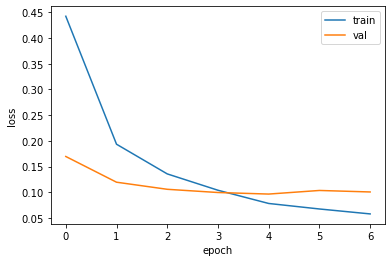

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [29]:
loss, accuracy = model.evaluate(test_input, test_target)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0924 - accuracy: 0.9755
Test loss: 0.0924
Test accuracy: 0.975


In [30]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout

class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.dense1 = Dense(512, activation='relu')
        self.dense2 = Dense(24, activation='relu')
        self.dropout = Dropout(0.25)
        self.dense3 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dropout(x)
        x = self.dense3(x)
        
        return x
    
model = MnistModel()
model.build(input_shape=(1,784))
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  401920    
_________________________________________________________________
dense_1 (Dense)              multiple                  12312     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  250       
Total params: 414,482
Trainable params: 414,482
Non-trainable params: 0
_________________________________________________________________


In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MnistModel2(nn.Module):
    
    def __itit__(self):
        super(MnistModel2, self).__itit__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 24)
        self.fc3 = nn.Linear(24, 10)
        self.dropout = nn.Dropout(p=0.25)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.dropout(x)
        x = self.fc3(x)
        
        return F.softmax(x, dim=1)
    
model = MnistModel2()
print(model)

MnistModel2()


In [32]:
model = nn.Sequential(nn.Linear(28*28, 512),
                     nn.ReLU(inplace=True),
                     nn.Linear(512, 24),
                     nn.ReLU(inplace=True),
                     nn.Linear(24, 10),
                     nn.Softmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=512, out_features=24, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=24, out_features=10, bias=True)
  (5): Softmax(dim=1)
)